## August 2023: END SEMESTER ASSESSMENT (ESA) 

## Housing price dataset of Bengaluru city

Problem Statement:
Housing price dataset of Bengaluru city is provided. Based on the given details predict the price of the house.
Below are features details 
- area_type: The type of the house area feature 'total_sqft' specifies.
- availability: The availability date or availability status of the property.
- location: The locality of the property in Bengaluru city.
- size: The size of the housing property in BHK (or Bedrooms etc.,).
- society: The name of the Apartment. This name is encrypted for confidentiality.
- total_sqft: The 'area_type' area of the property.
- bath: Number of bathrooms available in the house.
- balcony: Number of balcony/balconies the house has.
- price: Price of the housing property in Lakhs. (target feature) .

In [98]:
import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
import warnings
warnings.filterwarnings("ignore")

In [ ]:
Read the dataset and perform the following 
 1. Read/load the dataset as a pandas Dataframe.(1 mark)
 2. Print/show the dimensions of Dataframe i.e., no of rows and columns. (1 mark)
 3. Print/show the data types of all the features/columns. (1 mark)
 4. Print/show statistical summary of all the numeric featurs. (1 mark)
 5. Print/show statistical summary for all the categorical variable. (2 marks)
 6. Find out Feature wise Missing value counts. (2 marks) 

In [3]:
# 1. Read/load the dataset as a pandas Dataframe.
df = pd.read_csv("C:\Datasets\Bengaluru_House_Data.csv")
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
# 2. Print/show the dimensions of Dataframe i.e., no of rows and columns.
rows, columns = df.shape
print("Number of rows =",rows)
print("Number of columns =",columns)

Number of rows = 13320
Number of columns = 9


In [5]:
# 3. Print/show the data types of all the features/columns.
df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [6]:
# 4. Print/show statistical summary of all the numeric featurs. (1 mark)
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [7]:
# 5. Print/show statistical summary for all the categorical variable.
df.describe(include = 'object')

,area_type,availability,location,size,society,total_sqft
count,13320,13320,13319,13304,7818,13320
unique,4,81,1305,31,2688,2117
top,Super built-up Area,Ready To Move,Whitefield,2 BHK,GrrvaGr,1200
freq,8790,10581,540,5199,80,843


In [14]:
# 6. Find out Feature wise Missing value counts. (2 marks) 
missing_values = df.isnull().sum()
print("Missing value counts\n\n", missing_values)

Missing value counts

 area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64


In [ ]:
Perform Below Exploratory Data Analysis(EDA) Tasks.
 1. Show/Visualize the relationship between fetures 'bath' and 'price' using scattered plot. (1 marks) 
 2. Show/Visualize the relationship between fetures 'balcony'and 'price' using scattered plot. (1 mark) 
 3. show/Visualize the relationship between fetures 'bath','balcony' and 'price' using 3D Scatterplot. (2 marks) 
 4. Show outliers distribution of variable 'bath' by drawing Boxplot. (3marks)


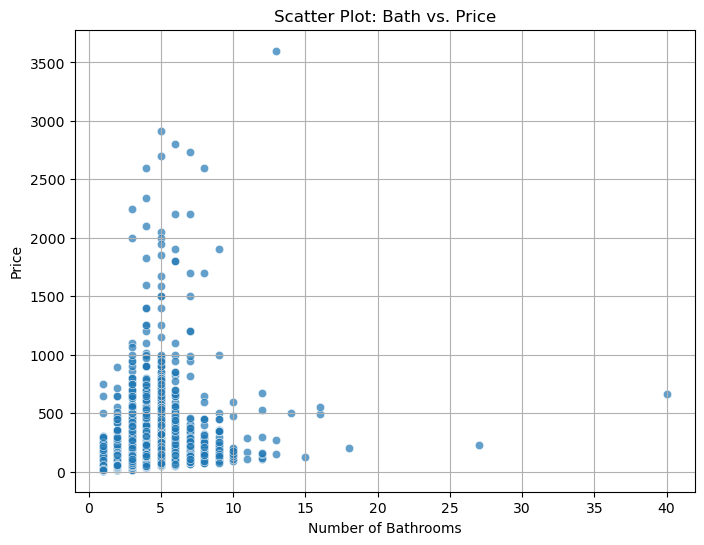

In [17]:
# 1. Show/Visualize the relationship between fetures 'bath' and 'price' using scattered plot.

plt.figure(figsize=(8, 6))
sns.scatterplot(x='bath', y='price', data=df, alpha=0.7)
plt.title("Scatter Plot: Bath vs. Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.grid(True)
plt.show()

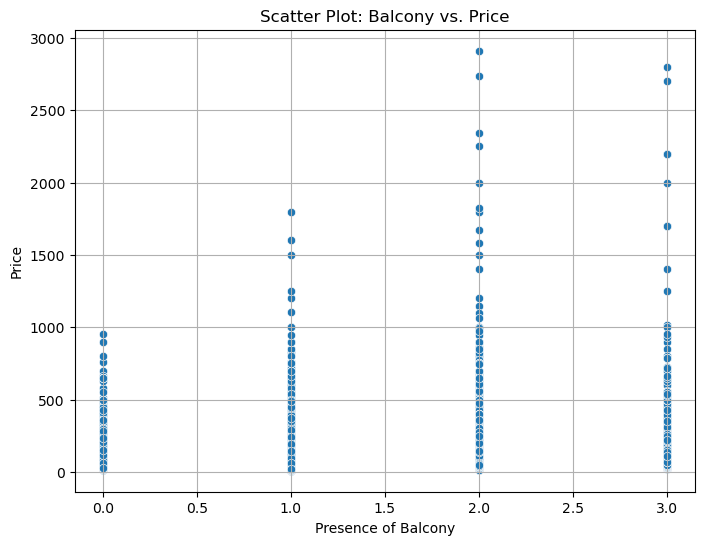

In [22]:
# 2. Show/Visualize the relationship between fetures 'balcony'and 'price' using scattered plot.

plt.figure(figsize=(8,6))
sns.scatterplot(x='balcony', y='price', data = df)
plt.title("Scatter Plot: Balcony vs. Price")
plt.xlabel("Presence of Balcony")
plt.ylabel("Price")
plt.grid(True)
plt.show()


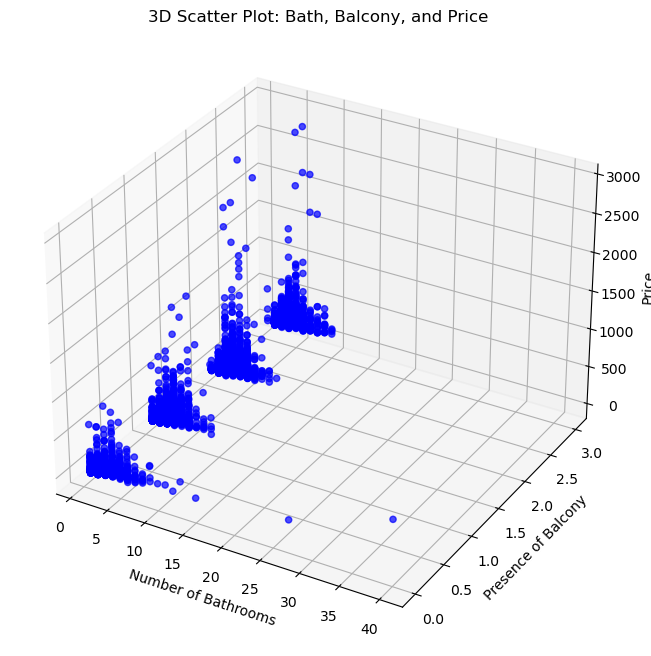

In [24]:
# 3. show/Visualize the relationship between fetures 'bath','balcony' and 'price' 
#    using 3D Scatterplot.

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['bath'], df['balcony'], df['price'], c='b', marker='o', alpha=0.7)

# Set labels for axes
ax.set_xlabel('Number of Bathrooms')
ax.set_ylabel('Presence of Balcony')
ax.set_zlabel('Price')

# Set title
plt.title("3D Scatter Plot: Bath, Balcony, and Price")

# Show the plot
plt.show()

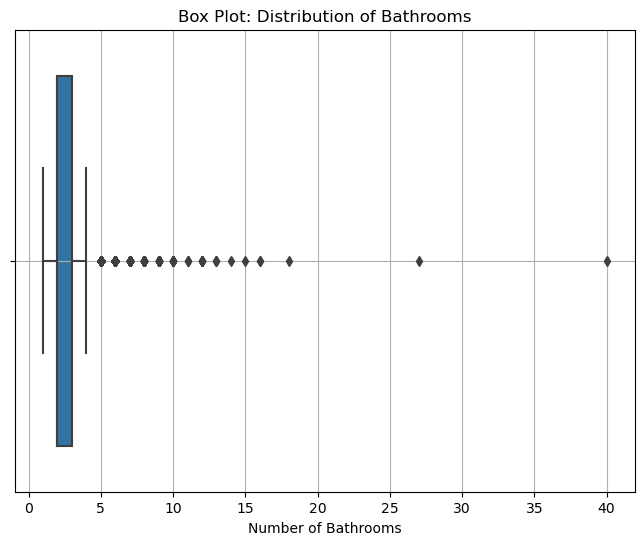

In [25]:
# 4. Show outliers distribution of variable 'bath' by drawing Boxplot.
plt.figure(figsize=(8, 6))
sns.boxplot(x='bath', data=df)
plt.title("Box Plot: Distribution of Bathrooms")
plt.xlabel("Number of Bathrooms")
plt.grid(True)
plt.show()

In [ ]:
Pre-process the Dataframe as Mentioned Below. (25 marks)
 1. Replace missing values of the feature 'balcony' with numerical value 0 and convert its feature type to int.(2 marks)
 2. Replace missing values of the feature 'bath' missing values with numerical 1 and convert feature type to int.(2 marks)
 3. Replace missing values of the feature 'location' with a constant "missing".(2 marks)
 4. Replace missing values of the feature 'society' with a constant "missing".(2 marks)
 5. Convert the feature 'size' to int by removing alphabetic content and keep only numeric content. In case of missing/null content replace by constant 
numeric value- 2. (3 marks) 
 6. Convert the feature 'total_sqft' to numerical using 'to_numeric' method. Also, replace all its missing entries by mean.(3 marks) 
 7. Eliminate all the outlies records/rows from Dataframe with respect to feature'bath' (2 marks)
 8. convert 3 categorical features i.e. 'availability', 'location' and 'society' into numerical using label encoding. ( 6 marks)
 9. Perform one hot encoding on feature 'area_type' , also ensure output columns are of type int (3 marks)

In [26]:
# 1. Replace missing values of the feature 'balcony' with numerical value 0 and convert its 
#    feature type to int.

# Replace missing values in 'balcony' with 0
df['balcony'].fillna(0, inplace=True)

# Convert 'balcony' feature to integer type
df['balcony'] = df['balcony'].astype(int)

# Verify the changes
print(df['balcony'].head())

0    1
1    3
2    3
3    1
4    1
Name: balcony, dtype: int32


In [28]:
# 2. Replace missing values of the feature 'bath' missing values with numerical 1 and 
#     convert feature type to int.

# Replace missing values in 'bath' with 1
df['bath'].fillna(1, inplace=True)

# Convert 'bath' feature to integer type
df['bath'] = df['bath'].astype(int)

# Verify the changes
print(df['bath'].head())

0    2
1    5
2    2
3    3
4    2
Name: bath, dtype: int32


In [29]:
# 3. Replace missing values of the feature 'location' with a constant "missing".

df['location'].fillna("missing", inplace=True)

# Verify the changes
print(df['location'].head())

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object


In [34]:
# 4. Replace missing values of the feature 'society' with a constant "missing".

df['society'].fillna("missing", inplace = True)

print(df['society'].head())

0    Coomee 
1    Theanmp
2    missing
3    Soiewre
4    missing
Name: society, dtype: object


In [ ]:
# 5. Convert the feature 'size' to int by removing alphabetic content and keep only 
# numeric content. 
# In case of missing/null content replace by constant numeric value- 2.

df['size'] = df['size'].str.replace('BHK','').str.replace('Bedroom','').str.replace(' RK','')

In [75]:
# Replace missing or null values with the constant value 2
df['size'].fillna(2, inplace=True)

# Convert 'size' feature to integer type
df['size'] = df['size'].astype(int)

# Verify the changes
print(df['size'].head())


0    2
2    3
3    3
4    2
5    2
Name: size, dtype: int32


In [76]:
df.isnull().sum()

availability                      0
location                          0
size                              0
society                           0
total_sqft                        0
bath                              0
balcony                           0
price                             0
area_type_Built-up  Area          0
area_type_Carpet  Area            0
area_type_Plot  Area              0
area_type_Super built-up  Area    0
dtype: int64

In [77]:
# 6. Convert the feature 'total_sqft' to numerical using 'to_numeric' method. 
#    Also, replace all its missing entries by mean.

df['total_sqft'] = pd.to_numeric(df['total_sqft'], errors ='coerce')
df['total_sqft'] = df['total_sqft'].fillna(df['total_sqft'].mean())

In [78]:
# 7. Eliminate all the outliers records/rows from Dataframe with respect to feature'bath'

# Detect and exclude outliers by Z-score

df_no_outliers = df[(np.abs(stats.zscore(df['bath'])) < 3)]

In the above code:

We calculate the Z-score for each value in the ‘bath’ column using stats.zscore(df['bath']).
The condition (np.abs(stats.zscore(df['bath'])) < 3) checks if the Z-score is within 3 standard deviations from the mean.
Rows that meet this condition are retained in the new DataFrame df_no_outliers.

In [79]:
# Detect and exclude outliers by IQR

# Calculate Q1 and Q3
Q1 = df['bath'].quantile(0.25)
Q3 = df['bath'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Exclude outliers
df = df[(df['bath'] >= lower_bound) & (df['bath'] <= upper_bound)]

In [59]:
# 8. convert 3 categorical features i.e. 'availability', 'location' and 'society' into 
#     numerical using label encoding.

# Initialize LabelEncoder
le = LabelEncoder()

# Apply label encoding to each categorical column
df['availability'] = le.fit_transform(df['availability'])
df['location'] = le.fit_transform(df['location'])
df['society'] = le.fit_transform(df['society'])

In [ ]:
# 9. Perform one hot encoding on feature 'area_type', also ensure 
#    output columns are of type int

# Perform one-hot encoding
df = pd.get_dummies(df, columns=['area_type'], dtype=int)

In the above code:

We use pd.get_dummies() to create new columns based on the unique values in the ‘area_type’ column.
The dtype=int ensures that the output columns are of integer type.

In [ ]:
Perform Below Modeling Tasks (15 marks)
 1. Split the processed Dataframe into 2 parts train and test with ratio as 70:30. 
        Ensure feature 'price' as target(y). (3 marks)
 2. Use OLS statsmodels package to build the Linear Regression model on the train set. 
        Also,generate the summary report. (6 marks)
 3. Using sklearn's linear regression model train model on the train set and 
        interpret the coefficients. (6 marks)


In [81]:
# 1. Split the processed Dataframe into 2 parts train and test with ratio as 70:30. 
#    Ensure feature 'price' as target(y)

# Features (X) excluding the target 'price'
X = df.drop('price', axis =1)

# Target variable (y)
y = df['price']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [82]:
# 2. Use OLS statsmodels package to build the Linear Regression model on the train set. 
#        Also,generate the summary report.

# Add a constant term to the features (intercept)
X_train_with_const = sm.add_constant(X_train)

# Create the OLS model
model = sm.OLS(y_train, X_train_with_const).fit()

# Print the summary report
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.435
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     661.8
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:56:07   Log-Likelihood:                -49962.
No. Observations:                8596   AIC:                         9.995e+04
Df Residuals:                    8585   BIC:                         1.000e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [83]:
# 3. Using sklearn's linear regression model train model on the train set and 
#        interpret the coefficients.

from sklearn.linear_model import LinearRegression

# Initialize the linear regression model
model = LinearRegression()

# Fit the regression model
lr_model = model.fit(X_train, y_train)
lr_model.coef_

array([ 1.01886720e-01, -4.55806713e-03,  1.52562881e+01, -2.17229855e-04,
        4.74704906e-02,  2.51958574e+01, -4.98509317e+00, -6.24227741e+00,
       -1.59085759e+01,  3.07096617e+01, -8.55880842e+00])

In [84]:
#        interpret the coefficients.

# Create a DataFrame with column names and corresponding coefficients
coef_df = pd.DataFrame(zip(X.columns, model.coef_), columns=['Predictor', 'Coefficient'])

# Print the regression coefficients
print(coef_df)


                         Predictor  Coefficient
0                     availability     0.101887
1                         location    -0.004558
2                             size    15.256288
3                          society    -0.000217
4                       total_sqft     0.047470
5                             bath    25.195857
6                          balcony    -4.985093
7         area_type_Built-up  Area    -6.242277
8           area_type_Carpet  Area   -15.908576
9             area_type_Plot  Area    30.709662
10  area_type_Super built-up  Area    -8.558808


### Interpretation:

1. Availability (availability):
    The coefficient for availability is approximately 0.10.
Interpretation: For every unit increase in availability (whatever that unit represents), we expect the housing price to increase by approximately 0.10 Lakhs, holding other predictors constant.
    
2. Location (location):
    The coefficient for location is approximately -0.0046.
Interpretation: A one-unit increase in the location (again, the specific unit is not defined) results in a decrease of approximately 0.0046 Lakhs in the housing price, assuming other predictors remain constant.
    
3. Size (size):
    The coefficient for size is approximately 15.26.
Interpretation: For every unit increase in size (e.g., square footage of the property), we expect the housing price to increase by approximately 15.26 Lakhs, assuming other predictors are held constant.
    
4. Society (society):
    The coefficient for society is approximately -0.0002.
Interpretation: Changes in the society (which is not clearly defined) have a negligible impact on the housing price.
    
5. Total Square Footage (total_sqft):
    The coefficient for total_sqft is approximately 0.0475.
Interpretation: For every additional square foot of total area, the housing price is expected to increase by approximately 0.0475 Lakhs, assuming other predictors remain constant.
    
6. Number of Bathrooms (bath):
    The coefficient for bath is approximately 25.20.
Interpretation: Each additional bathroom in the property is associated with an increase of approximately 25.20 Lakhs in the housing price.
    
7. Balcony (balcony):
    The coefficient for balcony is approximately -4.99.
Interpretation: Having a balcony is associated with a decrease of approximately 4.99 Lakhs in the housing price.
    
8. Area Type (area_type):
    The coefficients for different area types are as follows:
    Built-up Area: Approximately -6.24 Lakhs.
    Carpet Area: Approximately -15.91 Lakhs.
    Plot Area: Approximately 30.71 Lakhs.
    Super built-up Area: Approximately -8.56 Lakhs.
    
Interpretation: Compared to the reference area type (which is not specified), different area types have varying impacts on the housing price. For example:
    A property in a Plot Area tends to have a higher price by approximately 30.71 Lakhs.
    A property in a Carpet Area tends to have a lower price by approximately 15.91 Lakhs.

Model Comparisons and Hyperparameter tuning 
1. Train below models and obtain values using 5 fold cross validation on train data 
    and 'RMSE' metric. Find the metric (RMSE) score in test set and 
    suggest the best model.     ( 15 marks)
 - Ridge (alpha = 1, max_iter = 500) (5 marks)
 - Lasso (alpha = 0.01, max_iter = 500) (5 marks)
 - ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500) (5 marks)
2. Using Random search on Lasso model find the best value of alpha and 
   corresponding RMSE value on test set. ( 10 marks)

In [88]:
ridge = Ridge(alpha = 1, max_iter = 500)

# fit the model on train set
ridge.fit(X_train, y_train)

# fetch cross validation score
print(cross_val_score(estimator = ridge, X = X_train, y = y_train, cv = 5, 
                      scoring = 'neg_root_mean_squared_error').mean())

# fetch rmse on test set
y_pred = ridge.predict(X_test)
mean_squared_error(y_test, y_pred)

-84.42237595422374


6771.948475305413

In [91]:
lasso = Lasso(alpha = 1, max_iter = 500)

# fit the model on train set
lasso.fit(X_train, y_train)

# fetch cross validation score
print(cross_val_score(estimator = lasso, X = X_train, y = y_train, cv = 5, 
                      scoring = 'neg_root_mean_squared_error').mean())

# fetch rmse on test set
y_pred = lasso.predict(X_test)
mean_squared_error(y_test, y_pred)

-84.53946956939856


6820.055762811889

In [93]:
enet = ElasticNet(alpha = 0.1, l1_ratio = 0.01, max_iter = 500)

# fit the model on train set
enet.fit(X_train, y_train)

# fetch cross validation score
print(cross_val_score(estimator = enet, X = X_train, y = y_train, cv = 5, 
                      scoring = 'neg_root_mean_squared_error').mean())

# fetch rmse on test set
y_pred = enet.predict(X_test)
mean_squared_error(y_test, y_pred)

-84.54154031025674


6860.7820499262

Let’s compare their respective values:

Ridge: 6771.94
Lasso: 6820.05
ElasticNet: 6860.78

Based on these results, the Ridge model has the lowest value, making it the preferred choice among the three.

In [99]:
# 2. Using Random search on Lasso model find the best value of alpha and 
#   corresponding RMSE value on test set.

tuned_parameters = [{'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 5, 10, 20, 40, 60],}]
lasso = Lasso()

lasso_rand = RandomizedSearchCV(estimator = lasso, param_distributions=tuned_parameters, cv=10, n_iter=20, n_jobs=-1)

# fit the model
lasso_rand.fit(X_train, y_train)

# get the best parameters
print("Best parameters for Lasso Regression: ",lasso_rand.best_params_)


Best parameters for Lasso Regression:  {'alpha': 0.0001}


In [100]:
# print the corresponding rmse value on test set.
y_pred = lasso_rand.predict(X_test)
mean_squared_error(y_test, y_pred)

6771.914508850353